In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import math
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 101)
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import linear_model, metrics, model_selection, ensemble

In [53]:
basic = pd.read_csv('./data/PBP - 2016 - Week 1.csv')
df3 = pd.read_csv('./data/PBP - 2016 - Week 3.csv')
df4 = pd.read_csv('./data/PBP - 2016 - Week 4.csv')
df5 = pd.read_csv('./data/PBP - 2016 - Week 5.csv')
df6 = pd.read_csv('./data/PBP - 2016 - Week 6.csv')
df7 = pd.read_csv('./data/PBP - 2016 - Week 7.csv')
df8 = pd.read_csv('./data/PBP - 2016 - Week 8.csv')
basic = pd.concat([basic, df3, df4, df5, df6, df7, df8])
offense_stats = pd.read_csv('./data/Offense Stats 2016.csv')
defense_stats = pd.read_csv('./data/Defense Stats 2016.csv')

In [54]:
statsJoin = basic.join(offense_stats.set_index('School'), on='offenseTeam', rsuffix='_offense_stats')
statsJoin = statsJoin.join(defense_stats.set_index('School'), on='defenseTeam', rsuffix='_defense_stats')

In [55]:
statsJoin = statsJoin.dropna()
statsJoin

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards,Rk_defense_stats,Points Allowed,opponent completions,opponent attempts,opponent completion percentage,opponent passing yards,opponent passing touchdowns,opponent rush attempts,opponent rush yards,opponent average rush,opponent rush touchdowns,total opponent plays,total opponent yards,opponent total yards per play,opponent pass first downs,opponent rush first downs
374,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,0,349,Army,ARMY,218,Temple,TEM,0,0,1,15:00,2016-09-03T06:02:56Z,Kickoff,1,10,65,0,25,Mitchell Howard kickoff for 65 yds for a touch...,59.0,13.0,29.9,4.2,9.5,43.9,74.4,0.5,60.5,339.6,5.6,3.5,70.0,414.0,5.9,2.9,17.8,4.8,42.2,11.0,18.4,13.0,24.4,53.2,152.1,0.9,36.4,130.5,3.6,1.2,60.8,282.6,4.6,6.9,7.2
375,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,1,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,1,10,25,6,31,Ryquell Armstead run for 6 yds to the Temp 31,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
376,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,2,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,2,4,31,2,33,Ryquell Armstead run for 2 yds to the Temp 33,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
377,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,3,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Pass Reception,3,2,33,7,40,Phillip Walker pass complete to Marshall Ellic...,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
378,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,4,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Pass Reception,1,10,40,7,47,Phillip Walker pass complete to Marshall Ellic...,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,7,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Penalty,1,15,60,-5,65,"UL LAFAYETTE Penalty, false start (-5 Yards) t...",109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10286,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,8,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,1,20,65,19,46,Jordan Davis run for 19 yds to the TexSt 46,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10287,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,9,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,2,1,46,3,43,Raymond Calais run for 3 yds to the TexSt 43 f...,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2

In [56]:
statsJoin['type'].unique()

array(['Kickoff', 'Rush', 'Pass Reception', 'Penalty',
       'Pass Interception Return', 'Pass Incompletion', 'Sack',
       'Field Goal Missed', 'End Period', 'Rushing Touchdown', 'Punt',
       'Timeout', 'Field Goal Good', 'Fumble Recovery (Own)',
       'End of Half', 'End of Game', 'Passing Touchdown',
       'Blocked Field Goal', 'Defensive 2pt Conversion',
       'Kickoff Return (Offense)', 'Fumble Recovery (Opponent)',
       'Interception Return Touchdown', 'Safety',
       'Kickoff Return Touchdown', 'Punt Return Touchdown',
       'Blocked Punt', 'Fumble Return Touchdown', 'Coin Toss',
       'Missed Field Goal Return'], dtype=object)

In [57]:
statsJoin = statsJoin.replace('Pass Incompletion', 'Pass')
statsJoin = statsJoin.replace('Pass Reception', 'Pass')
statsJoin = statsJoin.replace('Passing Touchdown', 'Pass')
statsJoin = statsJoin.replace('Rushing Touchdown', 'Rush')
statsJoin = statsJoin.replace('Pass Interception Return', 'Pass')
statsJoin = statsJoin.replace('Sack', 'Pass')
statsJoin['type'].unique()
rush = statsJoin.query('type == "Rush"')
rush

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards,Rk_defense_stats,Points Allowed,opponent completions,opponent attempts,opponent completion percentage,opponent passing yards,opponent passing touchdowns,opponent rush attempts,opponent rush yards,opponent average rush,opponent rush touchdowns,total opponent plays,total opponent yards,opponent total yards per play,opponent pass first downs,opponent rush first downs
375,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,1,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,1,10,25,6,31,Ryquell Armstead run for 6 yds to the Temp 31,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
376,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,2,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,2,4,31,2,33,Ryquell Armstead run for 2 yds to the Temp 33,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
379,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,5,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,2,3,47,11,58,Ryquell Armstead run for 11 yds to the Army 42...,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
380,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,6,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:08:47Z,Rush,1,10,58,6,64,Ryquell Armstead run for 6 yds to the Army 36,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
383,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,9,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:08:47Z,Rush,1,15,69,3,72,David Hood run for 3 yds to the Army 28,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,4,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,2,7,64,2,62,Jordan Davis run for 2 yds to the LaLaf 38,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10283,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,5,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,3,5,62,7,55,Jordan Davis run for 7 yds to the LaLaf 45 for...,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10286,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,8,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,1,20,65,19,46,Jordan Davis run for 19 yds to the TexSt 46,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,

In [58]:
rush.columns

Index(['gameId', 'year', 'week', 'homeId', 'homeTeam', 'homeAbbr', 'awayId',
       'awayTeam', 'awayAbbr', 'driveIndex', 'playIndex', 'offenseId',
       'offenseTeam', 'offenseAbbr', 'defenseId', 'defenseTeam', 'defenseAbbr',
       'homeScore', 'awayScore', 'quarter', 'clock', 'wallclock', 'type',
       'down', 'distance', 'yardLine', 'yardsGained', 'endYardLine',
       'description', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush', 'Number of Penalties',
       'Penalty yards', 'Rk_defense_stats', 'Points Allowed',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent

In [101]:
rush_labels = rush['yardsGained']
rush_features = rush[[
       'down', 'distance', 'yardLine',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
        'First down by rush', 'Number of Penalties',
       'Penalty yards',  'Points Allowed',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns', 'total opponent plays',
       'total opponent yards', 'opponent total yards per play',
       'opponent pass first downs', 'opponent rush first downs']]

In [82]:
regr = ensemble.RandomForestRegressor(n_estimators=150)
regr.fit(rush_features, rush_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [83]:
regr.score(rush_features, rush_labels)

0.778519029438904

## Test with week 2 data

In [123]:
week2 = pd.read_csv('./data/PBP - 2016 - Week 2.csv')

In [124]:
week2 = week2.join(offense_stats.set_index('School'), on='offenseTeam', rsuffix='_offense_stats')
week2 = week2.join(defense_stats.set_index('School'), on='defenseTeam', rsuffix='_defense_stats')

In [125]:
week2= week2.dropna()
week2 = week2.replace('Pass Incompletion', 'Pass')
week2 = week2.replace('Pass Reception', 'Pass')
week2 = week2.replace('Passing Touchdown', 'Pass')
week2 = week2.replace('Rushing Touchdown', 'Rush')
week2 = week2.replace('Sack', 'Pass')

In [126]:
week2_labels = week2['yardsGained']
week2_features = week2[[
       'down', 'distance', 'yardLine',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
        'First down by rush', 'Number of Penalties',
       'Penalty yards',  'Points Allowed',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns', 'total opponent plays',
       'total opponent yards', 'opponent total yards per play',
       'opponent pass first downs', 'opponent rush first downs']]

In [76]:
regr.score(week2_features, week2_labels)

-0.022757039377622412

In [77]:
week2_preds = regr.predict(week2_features)

In [78]:
week2_labels.describe()

count    4330.000000
mean        5.995381
std        11.290407
min       -34.000000
25%         0.000000
50%         2.000000
75%         8.000000
max        99.000000
Name: yardsGained, dtype: float64

In [79]:
pd.DataFrame(week2_preds).describe()

,0
count,4330.000000
mean,5.956818
std,2.353121
min,-2.240000
25%,4.526667
50%,5.707048
75%,7.101944
max,19.329444


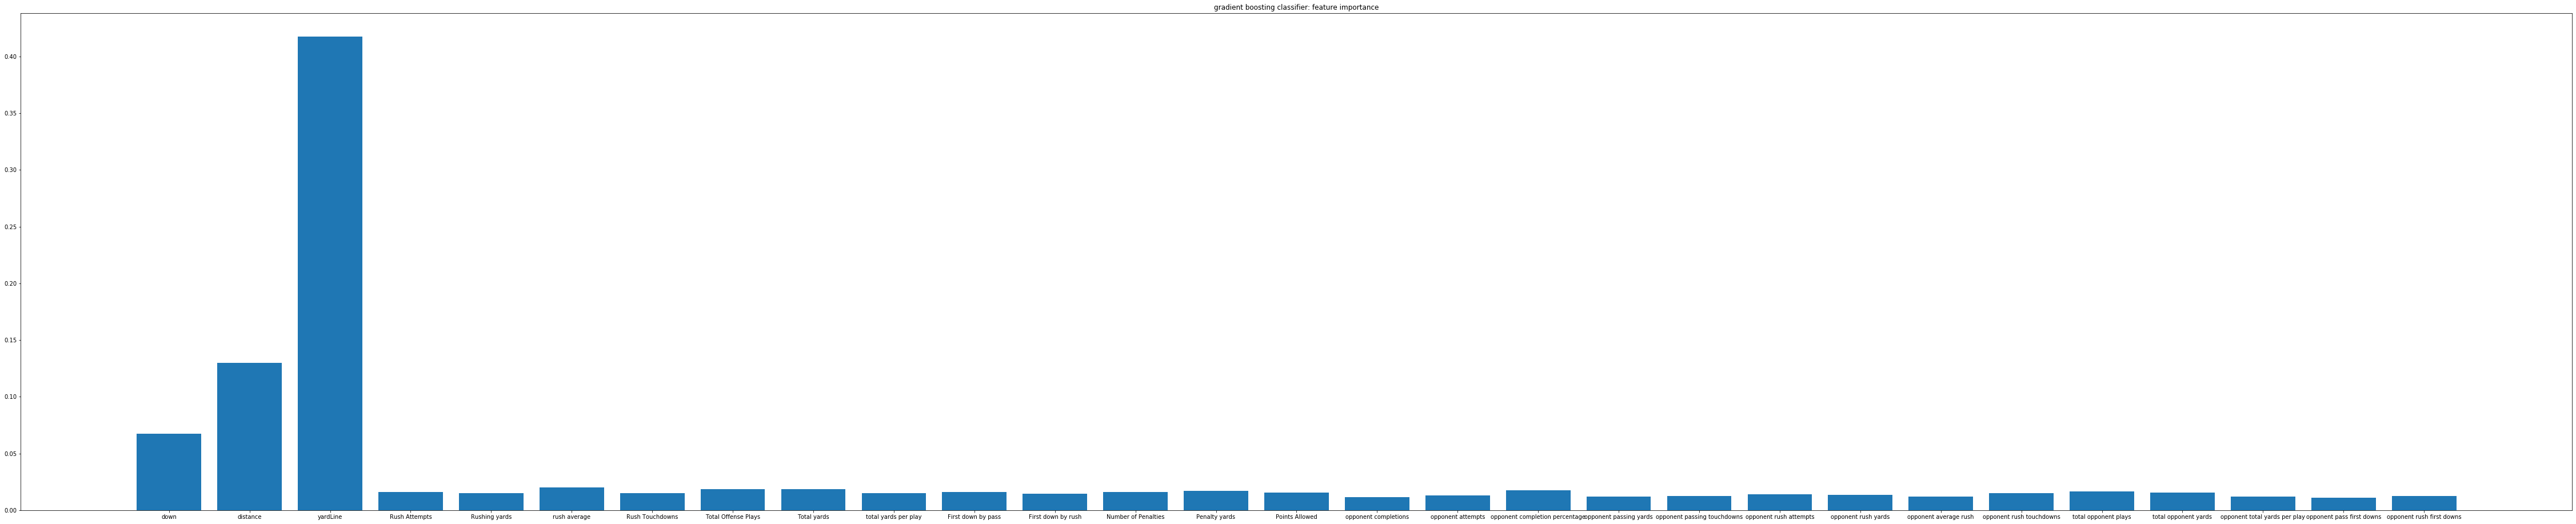

In [84]:
features = [
       'down', 'distance', 'yardLine',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
        'First down by rush', 'Number of Penalties',
       'Penalty yards',  'Points Allowed',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns', 'total opponent plays',
       'total opponent yards', 'opponent total yards per play',
       'opponent pass first downs', 'opponent rush first downs']
fig, ax = plt.subplots(1,1,figsize=(80,16))

feature_importance = regr.feature_importances_.tolist()
plt.clf()
plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [80]:
math.sqrt(metrics.mean_squared_error(week2_labels, week2_preds))

11.416834214484284

## Trying XGBoost

In [102]:
import xgboost as xgb

In [103]:
param = {'max_depth': 2, 'eta': 1}
param['nthread'] = 4
param['eval_metric'] = 'rmse'

In [104]:
dtrain = xgb.DMatrix(rush_features, label=rush_labels)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [114]:
boost = xgb.train(param, dtrain, num_boost_round=10)

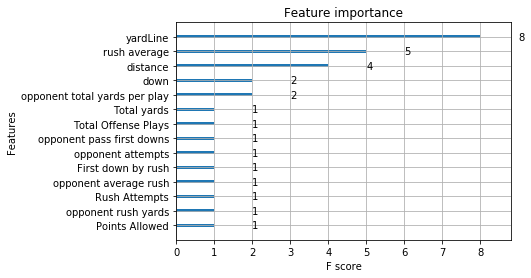

In [115]:
xgb.plot_importance(boost)

In [116]:
preds = boost.predict(dtrain)
pd.DataFrame(preds).describe()

,0
count,15722.000000
mean,5.149183
std,1.481825
min,-2.305547
25%,4.519750
50%,5.258634
75%,5.999144
max,16.725788


In [117]:
rush_labels.describe()

count    15722.000000
mean         5.149281
std          8.092724
min        -18.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         91.000000
Name: yardsGained, dtype: float64

## Ridge?

In [120]:
ridge = linear_model.Ridge().fit(rush_features, rush_labels)

In [121]:
ridge.score(rush_features, rush_labels)

0.01630337668847892

In [127]:
week2_preds = ridge.predict(week2_features)

In [128]:
math.sqrt(metrics.mean_squared_error(week2_labels, week2_preds))

11.321781874885751

## Lasso?

In [130]:
lasso = linear_model.Lasso().fit(rush_features, rush_labels)

In [131]:
lasso.score(rush_features, rush_labels)

0.010620869445313263

In [132]:
week2_preds = lasso.predict(week2_features)

In [133]:
math.sqrt(metrics.mean_squared_error(week2_labels, week2_preds))

11.315279207685276

## Elastic Net?

In [134]:
elastic = linear_model.ElasticNet().fit(rush_features, rush_labels)

In [135]:
elastic.score(rush_features, rush_labels)

0.012634784087130813

In [136]:
week2_preds = elastic.predict(week2_features)
math.sqrt(metrics.mean_squared_error(week2_labels, week2_preds))

11.318411011636764

## Adding more outliers?

In [153]:
rush = pd.concat([rush,rush.query('yardsGained > 30 | yardsGained < 0'), 
                  rush.query('yardsGained > 30 | yardsGained < 0'), rush.query('yardsGained == 0')])   
rush

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards,Rk_defense_stats,Points Allowed,opponent completions,opponent attempts,opponent completion percentage,opponent passing yards,opponent passing touchdowns,opponent rush attempts,opponent rush yards,opponent average rush,opponent rush touchdowns,total opponent plays,total opponent yards,opponent total yards per play,opponent pass first downs,opponent rush first downs
375,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,1,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,1,10,25,6,31,Ryquell Armstead run for 6 yds to the Temp 31,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
376,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,2,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,2,4,31,2,33,Ryquell Armstead run for 2 yds to the Temp 33,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
379,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,5,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,2,3,47,11,58,Ryquell Armstead run for 11 yds to the Army 42...,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
380,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,6,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:08:47Z,Rush,1,10,58,6,64,Ryquell Armstead run for 6 yds to the Army 36,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
383,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,9,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:08:47Z,Rush,1,15,69,3,72,David Hood run for 3 yds to the Army 28,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,8,0,309,Louisiana,ULL,326,Texas State,TXST,3,10,2,6:41,2016-10-23T07:02:08Z,Rush,1,10,67,0,67,Elijah McGuire run for no gain to the LaLaf 33,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10242,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,15,3,309,Louisiana,ULL,326,Texas State,TXST,3,20,3,5:11,2016-10-23T08:19:51Z,Rush,4,1,24,0,24,Jordan Wright run for no gain to the TexSt 24,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10248,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,17,0,309,Louisiana,ULL,326,Texas State,TXST,3,20,3,2:13,2016-10-23T08:26:53Z,Rush,1,10,63,0,63,Anthony Jennings run for no gain to the LaLaf 37,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,22

In [161]:
rush_labels = rush['yardsGained']
rush_features = rush[[
       'down', 'distance', 'yardLine',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
        'First down by rush', 'Points Allowed', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns', 'total opponent plays',
       'total opponent yards', 'opponent total yards per play',
       'opponent pass first downs', 'opponent rush first downs']]

In [162]:
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(rush_features, rush_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
week2_preds = gbr.predict(week2_features)
math.sqrt(metrics.mean_squared_error(week2_labels, week2_preds))

ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 28 

In [157]:
pd.DataFrame(week2_preds).describe()

,0
count,4330.000000
mean,4.404298
std,3.872639
min,-12.877870
25%,2.008141
50%,4.504283
75%,6.456264
max,22.444416


In [158]:
week2_labels.describe()

count    4330.000000
mean        5.995381
std        11.290407
min       -34.000000
25%         0.000000
50%         2.000000
75%         8.000000
max        99.000000
Name: yardsGained, dtype: float64

In [159]:
import pickle
filename = 'models/rush_reg_2.sav'
pickle.dump(gbr, open(filename, 'wb'))

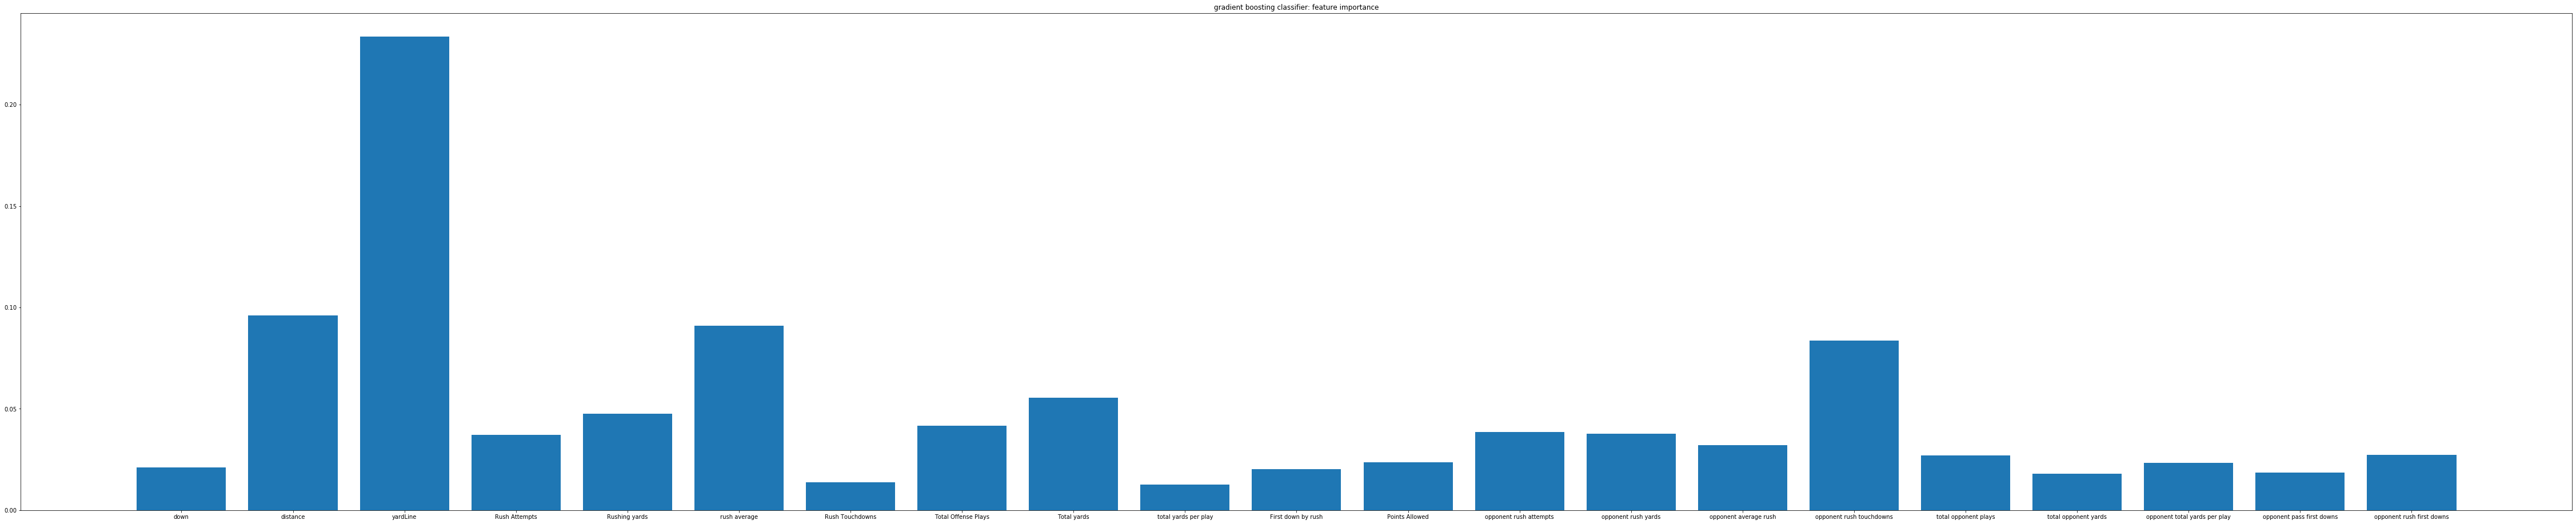

In [164]:
features = [
       'down', 'distance', 'yardLine',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
        'First down by rush', 'Points Allowed', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns', 'total opponent plays',
       'total opponent yards', 'opponent total yards per play',
       'opponent pass first downs', 'opponent rush first downs']
fig, ax = plt.subplots(1,1,figsize=(80,16))

feature_importance = gbr.feature_importances_.tolist()
plt.clf()
plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [165]:
week2_labels = week2['yardsGained']
week2_features = week2[[
       'down', 'distance', 'yardLine',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
        'First down by rush', 'Points Allowed', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns', 'total opponent plays',
       'total opponent yards', 'opponent total yards per play',
       'opponent pass first downs', 'opponent rush first downs']]

In [166]:
week2_preds = gbr.predict(week2_features)
math.sqrt(metrics.mean_squared_error(week2_labels, week2_preds))

11.917506372456923

In [167]:
pd.DataFrame(week2_preds).describe()

,0
count,4330.000000
mean,4.427634
std,3.843180
min,-9.541495
25%,1.883522
50%,4.632681
75%,6.449125
max,26.793841


In [168]:
week2_labels.describe()

count    4330.000000
mean        5.995381
std        11.290407
min       -34.000000
25%         0.000000
50%         2.000000
75%         8.000000
max        99.000000
Name: yardsGained, dtype: float64

In [169]:
import pickle
filename = 'models/rush_reg_2.sav'
pickle.dump(gbr, open(filename, 'wb'))